<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
import pandas as pd # Import pandas as pd and import the lemmatized data used in previous assignments.
df = pd.read_csv("data_lemmatized.csv") # Contains 500 tweets for search word "Data Mining"

In [2]:
import numpy as np # Using the code from assignment 03 to clean the lemmatized data so that it can be used as list.
from numpy import nan

df = pd.read_csv("data_lemmatized.csv") # Contains 500 tweets for search word "Data Mining"

# Since the list new contains nan values now that it is extracted from csv. remove all of those.
new_list = df.values.tolist()
for i in range(0,500):
  del new_list[i][0] # removes the index
  new_list[i] = list(set(new_list[i])) # removes all the nan and bring it to 1
  if new_list[i].count(nan) == 1: # remove all nan values
    new_list[i].remove(nan)
  else:
    1 ==1
    
data_lemmatized = new_list

In [3]:
# Import all the necessary libraries for the assignment
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel



# Create dictionary using corpora module and create the corpus from the lemmatized data
id2word = corpora.Dictionary(data_lemmatized) # from the link above
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]

In [4]:
# Build base LDA Model

lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word, num_topics=20, random_state=100,chunksize=100,passes=10,per_word_topics=True)

#### Top n-grams used for topic modeling

In [5]:
# View Topics base on the base model
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.073*"datum" + 0.061*"miner" + 0.056*"ga" + 0.056*"unload" + '
  '0.056*"center_operation" + 0.056*"college_park" + 0.056*"new" + '
  '0.017*"hour" + 0.017*"mine" + 0.017*"tagcoin"'),
 (1,
  '0.066*"mining" + 0.066*"datum" + 0.061*"people" + 0.055*"taking_advantage" '
  '+ 0.055*"call" + 0.055*"canada_action" + 0.018*"internet" + 0.016*"privacy" '
  '+ 0.016*"privacymatter" + 0.016*"protection"'),
 (2,
  '0.038*"facebook" + 0.038*"tha" + 0.038*"ongoing" + 0.038*"war" + '
  '0.038*"completely" + 0.038*"current" + 0.038*"ignore" + 0.038*"shitstorm" + '
  '0.038*"acczibit" + 0.010*"schedule"'),
 (3,
  '0.056*"datum" + 0.047*"power" + 0.042*"tagcoin" + 0.042*"one" + 0.042*"see" '
  '+ 0.037*"real" + 0.032*"mine" + 0.027*"co" + 0.026*"backed_nft" + '
  '0.016*"help"'),
 (4,
  '0.080*"company" + 0.080*"try" + 0.077*"family" + 0.077*"got_mad" + '
  '0.077*"garland" + 0.077*"million" + 0.077*"question" + 0.077*"panorama" + '
  '0.077*"made_via" + 0.077*"education"'),
 (5,
  '0.034*"co

In [6]:
# Base Line Coherence - This is the coherence 

from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.33938459434500334


In [7]:
# OPTIMUM NUMBER OF K-TOPICS BASED ON COHORENCE SCORE Function.
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

### Shows different values of coherence for increase in num of topics by 2. We need to choose 10 topics for this assignment.

In [10]:
import os # This for gensim model to work that provides 
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = r'C:/new_mallet/mallet-2.0.8/bin/mallet'

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=12, step=2)

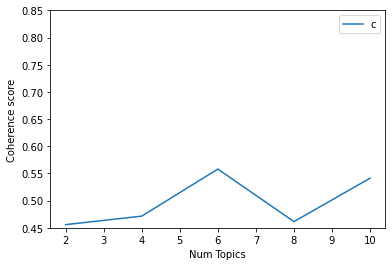

In [13]:
import matplotlib.pyplot as plots
# Show graph
limit=12; start=2; step=2;
x = range(start, limit, step)
plots.plot(x, coherence_values)
plots.xlabel("Num Topics")
plots.ylabel("Coherence score")
plots.legend(("coherence_values"), loc='best')
plots.ylim([0.45, 0.85])
plots.show()

In [14]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4558
Num Topics = 4  has Coherence Value of 0.4715
Num Topics = 6  has Coherence Value of 0.558
Num Topics = 8  has Coherence Value of 0.4614
Num Topics = 10  has Coherence Value of 0.5412


### 2. Choose top 10 clusters for topics.

In [15]:
# Select the top 10 clusters
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.186*"call" + 0.173*"family" + 0.139*"involve" + 0.124*"school" + '
  '0.110*"run" + 0.098*"child" + 0.041*"company" + 0.004*"pro" + 0.004*"tune" '
  '+ 0.004*"peak"'),
 (1,
  '0.062*"bitcoin" + 0.043*"miner" + 0.031*"unload" + 0.031*"college_park" + '
  '0.031*"center_operation" + 0.031*"ga" + 0.024*"big" + 0.024*"thing" + '
  '0.024*"base" + 0.017*"internet"'),
 (2,
  '0.256*"mining" + 0.253*"data" + 0.030*"provide" + 0.028*"webscrape" + '
  '0.025*"copy_paste" + 0.025*"excel_google" + 0.023*"service" + 0.010*"make" '
  '+ 0.008*"group" + 0.008*"work"'),
 (3,
  '0.190*"mining" + 0.031*"child" + 0.028*"project" + 0.023*"like_pac" + '
  '0.023*"dunno" + 0.023*"hard_ni" + 0.023*"hate" + 0.023*"heavily_influence" '
  '+ 0.023*"pac" + 0.021*"election"'),
 (4,
  '0.150*"company" + 0.148*"run" + 0.144*"school" + 0.139*"child" + '
  '0.121*"involve" + 0.114*"call" + 0.017*"mining" + 0.008*"description" + '
  '0.004*"repeat" + 0.004*"facility"'),
 (5,
  '0.178*"family" + 0.168*"compa

**1**<br>
(0,'0.186*"call" + 0.173*"family" + 0.139*"involve" + 0.124*"school" + '
  '0.110*"run" + 0.098*"child" + 0.041*"company" + 0.004*"pro" + 0.004*"tune" '
  '+ 0.004*"peak"')<br>
This cluster has highest density of word call, family, involve, school, company, tune, peak, run, child, etc. - Based on this it looks like the topic for this cluster is - **Work from Home**

**2** <br>(1,
  '0.062*"bitcoin" + 0.043*"miner" + 0.031*"unload" + 0.031*"college_park" + '
  '0.031*"center_operation" + 0.031*"ga" + 0.024*"big" + 0.024*"thing" + '
  '0.024*"base" + 0.017*"internet"')<br>
This cluster has highest density of words bitcoin, miner, internet, big, thing, college_park etc. - Based on this it looks like the topic for this cluster is - **Bitcoin mining**

**3** <br>(2,
  '0.256*"mining" + 0.253*"data" + 0.030*"provide" + 0.028*"webscrape" + ''0.025*"copy_paste" + 0.025*"excel_google" + 0.023*"service" + 0.010*"make" '
  '+ 0.008*"group" + 0.008*"work"')<br>
This cluster has highest density of wordsdata, mining, webscrape, copy_paste, service, make etc. - Based on this it looks like the topic for this cluster is - **Web Scraping**

**4** <br>(3,'0.190*"mining" + 0.031*"child" + 0.028*"project" + 0.023*"like_pac" + '
  '0.023*"dunno" + 0.023*"hard_ni" + 0.023*"hate" + 0.023*"heavily_influence" '
  '+ 0.023*"pac" + 0.021*"election"')<br>
This cluster has highest density of child, pac, election, heavy_influence etc. - Based on this it looks like the topic for this cluster is - **Data mining for election**

**5** <br>(4,
  '0.150*"company" + 0.148*"run" + 0.144*"school" + 0.139*"child" + '
  '0.121*"involve" + 0.114*"call" + 0.017*"mining" + 0.008*"description" + '
  '0.004*"repeat" + 0.004*"facility"')<br>
This cluster has highest density of company, run, school, child, involve, call, mining, description, facility etc. - Based on this it looks like the topic for this cluster is - **Mining tutorials for kids**

**6** <br>(5,
  '0.178*"family" + 0.168*"company" + 0.062*"education" + 0.062*"garland" + '
  '0.059*"million" + 0.059*"got_mad" + 0.059*"made_via" + 0.059*"panorama" + '
  '0.059*"question" + 0.012*"child"')<br>
This cluster has highest density of family, education, got_mad, million, question, child, panaroma, garland etc. - Based on this it looks like the topic for this cluster is - **Child's perspective**

**7** <br>(6,
  '0.389*"mining" + 0.065*"people" + 0.046*"taking_advantage" + '
  '0.041*"canada_action" + 0.016*"year" + 0.014*"eldenre" + 0.014*"ad" + '
  '0.011*"srlbukdfxa" + 0.011*"full" + 0.011*"price"')<br>
This cluster has highest density of mining, taking_advantage, canada_action, price, full etc. - Based on this it looks like the topic for this cluster is - **Sales in mining industry**

**8** <br>(7,
  '0.203*"https" + 0.050*"netflix_wherever" + 0.050*"favourite_serie" + '
  '0.048*"free_download" + 0.045*"enjoy" + 0.043*"daisy_thee" + 0.018*"rig" + '
  '0.018*"social_media" + 0.015*"focus" + 0.015*"facebook"')<br>
This cluster has highest density of netflix, social_media, facebook, enjoy etc. - Based on this it looks like the topic for this cluster is - **Social Media**

**9** <br>(8,
  '0.289*"datum" + 0.039*"power" + 0.037*"mine" + 0.030*"gold" + 0.028*"learn" '
  '+ 0.028*"tagcoin" + 0.019*"real" + 0.016*"machine" + 0.014*"ai" + '
  '0.012*"nft"')<br>
This cluster has highest density of datum, power, mine, gold, learn, ai, machine etc. - Based on this it looks like the topic for this cluster is - **Power of data**

**10** <br>(9,
  '0.259*"data" + 0.102*"research" + 0.099*"web" + '
  '0.091*"business_datascraper" + 0.091*"entry_scrape" + 0.013*"supply" + '
  '0.010*"thesis" + 0.010*"rule" + 0.010*"prediction" + 0.010*"robust"')<br>
This cluster has highest density of data, web, research, robust, prediction, rule etc. - Based on this it looks like the topic for this cluster is - **prediction using data research**

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [57]:
# Import tweets data - used different data with more evenly distributed target variable
df_tweets = pd.read_csv("tweet_sentiment.csv")
df_tweets

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1009,1,@nbensalem i'm sitting at my house and i'm soo...
1010,1,"Ordered some maternity clothes online, which c..."
1011,1,@citizensheep
1012,1,@thesage1014 I wish I could! Gotta work though


In [58]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english")) 
from textblob import TextBlob
from textblob import Word


#################### TRAINING DATA ###########################
# Convert all the words to lower. Example: "Upper" and "upper" are different because they have different ascii keys.
df_tweets['text'] = df_tweets['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove the punctuations and special characters
df_tweets['text'] = df_tweets['text'].str.replace("@,#,$,!,^,&,*,_,+,=,~,`,,,.,:,;,/,?",'') # remove puncuation special characters and numbers

# remove all the stopwords from english language
df_tweets['text'] = df_tweets['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Tokenize and Lemmatize the texts.
df_tweets['text'] = df_tweets['text'].apply(lambda x: TextBlob(x).words)
df_tweets['text'] = df_tweets['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Feature selection

In [68]:
# Now we need to transform the data and then we can split the data to train and test data.
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf_vec.fit(df_tweets['text'])
x_values =  tf_idf_vec.transform(df_tweets['text'])
y_values = df_tweets['target']


# Split the training data to training and validating data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [69]:
# Define functions and variables that will perform the metrics i.e Evaluation measurement:
# (1) Accuracy, (2) Recall, (3) Precison, (4) F-1 score 
# this metrics will be used for all models and we need to write the code again but simply call these functions.

# Import metrics module from sklearn.
from sklearn import metrics

def evaluation(y_pred, y_test):
    Accuracy = metrics.accuracy_score(y_pred, y_test)
    Recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    Precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro') # micro calculates total true positives, false negatives and false positives
    F1 = 2 * (Precision * Recall) / (Precision + Recall) # Formula for F1 Score
    print("Accuracy: ", Accuracy.round(4))
    print("Recall:", Recall.round(4))
    print("Precision:", Precision.round(4))
    print("F-1 score:", F1.round(4))

### Select two models using scikit learn and compare the provided metrics.

### Multinomial Naive Bayes model

In [70]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

# Create the model.
naive_bayes_model = naive_bayes.MultinomialNB()

# Fit the training data
naive_bayes_model.fit(x_train,y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = naive_bayes_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(naive_bayes_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.5172
Recall: 0.5172
Precision: 0.5172
F-1 score: 0.5172
Cross Validation Score: 0.5576


### SVM model

In [71]:
from sklearn import svm

# Create the model.
svm_model = svm.SVC()

# Fit the training data
svm_model.fit(x_train,y_train) # Fit the model using the training dataset

# Pass the validation dataset and see the evaluation scores
y_pred_valid = svm_model.predict(x_valid) # predict y_valid using x_valid
evaluation(y_pred_valid, y_valid) # Run the evaluation function that gives evaluation scores
print("Cross Validation Score:", cross_val_score(svm_model, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(4))

Accuracy:  0.5025
Recall: 0.5025
Precision: 0.5025
F-1 score: 0.5025
Cross Validation Score: 0.5224


**The multinomial Naive Bayes has higher score in terms of accuracy, recall, precision, F1 score and Cross validation score as compared to the SVM model. Although both the models do not have high metrics to actually implement it. Therefore, the model needs lot more data to learn from and this MIGHT be a case of underfitting.**

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [73]:
# Import train and test data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [77]:
df_train.describe() # General statistics for training data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
df_test.describe() # General statistics for testing data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [99]:
# Import necessary libraries from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Drop null values from both test and train data.
df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()

# SalePrice will be our target variable and the ID can be dropped since it doesnt add any value
x_training = df_train.drop(['SalePrice','Id'], axis=1)
y_training = np.log(df_train.SalePrice) # Use log so that the values are reduced for better accuracy and use exp later


x_train, x_test, y_train, y_test = train_test_split(x_training,y_training,random_state = 21, test_size=0.2)


# Create the model and pass the training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

# Predict values using model.predict
y_pred = regressor.predict(x_test)

In [92]:
# Check the score of the model
print('Linear Regression R squared": %.4f' % regressor.score(x_test, y_test))

Linear Regression R squared": 0.8634


**i.e. 86.34% variability in X xan be explained with Y.**

In [102]:
# Calculate RMSE value
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(np.exp(y_pred), y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

195747.28015953477


Therefore, the actual price of the house can differ with prediction value UP TO $195747.28

In [112]:
results_dict = {"Predicted Prices":np.exp(y_pred),"Actual Prices":np.exp(y_test)}
df_results = pd.DataFrame(results_dict)
df_results["Percentage Difference"] = round(abs((df_results["Predicted Prices"] - df_results["Actual Prices"]) / df_results["Actual Prices"]) * 100,2)
df_results

,Predicted Prices,Actual Prices,Percentage Difference
880,156677.762126,157000.0,0.21
605,229973.921577,205000.0,12.18
1166,245358.948864,245350.0,0.00
216,218109.586021,210000.0,3.86
970,86909.329260,135000.0,35.62
...,...,...,...
218,231419.797074,311500.0,25.71
1228,311321.804719,367294.0,15.24
1007,93234.996099,88000.0,5.95
575,109041.447359,118500.0,7.98
